# Walmart: Sales in Stormy Weather

https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather/


### Анализ и визуализация продаж различных товаров для разных магазинов

In [2]:
import pandas as pd
import datetime
import numpy as np

In [4]:
import matplotlib 
import matplotlib.pylab as plt
% matplotlib inline

matplotlib.style.use('ggplot')

Загружаем тренировочную выборку

In [5]:
#key_df =     pd.read_csv('data\\key.csv')
train_df =   pd.read_csv('data\\train.csv')
#test_df =    pd.read_csv('data\\test.csv')
#weather_df = pd.read_csv('data\\weather.csv')

In [ ]:
key_df.head()

In [6]:
train_df.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [1]:
# test_df.head()

In [2]:
# weather_df.head()

Конвертация дат к формату `datetime`

In [9]:
def convert_date(str_date):
    return datetime.date(*map(int,str_date.split('-')))

convert_date('2012-01-01')

datetime.date(2012, 1, 1)

In [11]:
train_df.date = train_df.date.apply(convert_date)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
date         object
store_nbr    int64
item_nbr     int64
units        int64
dtypes: int64(3), object(1)
memory usage: 158.5+ MB


Продажи всех товаров в магазине `store_nbr==1` с течением в ремени

(array([ 734563.,  734655.,  734747.,  734838.,  734928.,  735020.,
         735112.,  735203.,  735293.,  735385.,  735477.]),
 <a list of 11 Text xticklabel objects>)

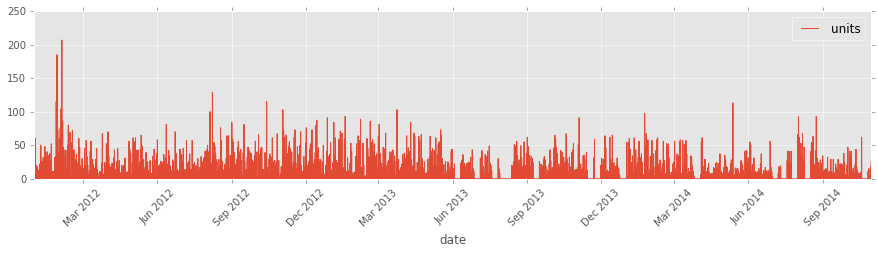

In [22]:
train_df[train_df.store_nbr==1].plot('date','units',figsize=(15,3))
plt.xticks(rotation=45);

На рисунке видны провалы в продажах начиная с июня 2013, соответствующие отсутствующим в тренировочной (трейнинговой) выборке данным о продажах, которые необходимо предсказывать.

In [13]:
train_df.describe()

,store_nbr,item_nbr,units
count,4617600.000000,4617600.000000,4617600.000000
mean,23.091082,56.000000,0.986876
std,12.952808,32.041643,9.875798
min,1.000000,1.000000,0.000000
25%,12.000000,28.000000,0.000000
50%,23.000000,56.000000,0.000000
75%,34.000000,84.000000,0.000000
max,45.000000,111.000000,5568.000000




Суммарные за всё время продажи товаров для каждого из магазинов

In [26]:
train_group_dates_df = train_df.groupby(by=['store_nbr','item_nbr'])['units'].sum()

In [39]:
train_group_dates_df=pd.DataFrame(train_group_dates_df).reset_index()  
train_group_dates_df.head()

,store_nbr,item_nbr,units
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0


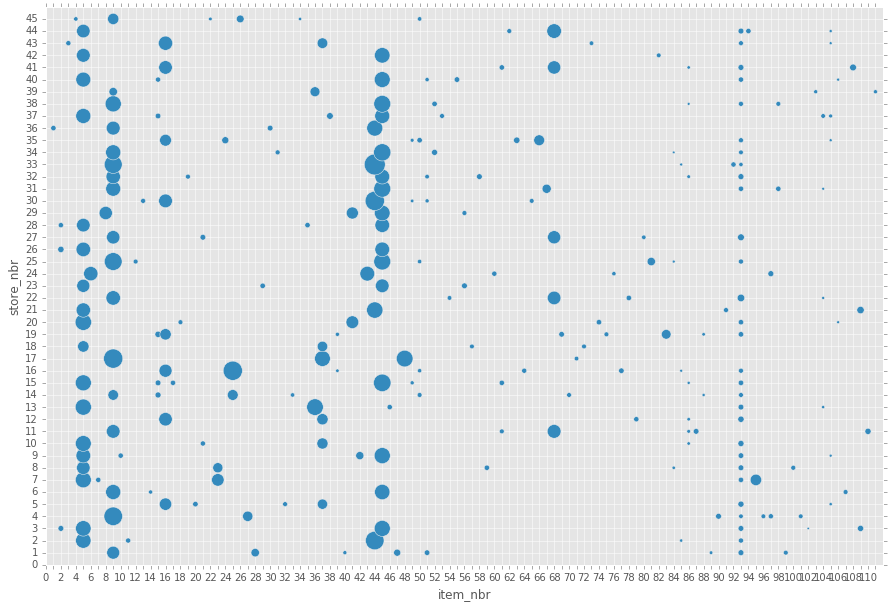

In [66]:
train_group_dates_df.plot.scatter('item_nbr','store_nbr',s=np.sqrt(train_group_dates_df.units), figsize=(15,10))
plt.xlim([0,112])
plt.ylim([0,46]);
plt.xticks(np.r_[0:112:1], [i if i%2==0 else '' for i in np.r_[0:112:1] ]);
plt.yticks(np.r_[0:46:1]);

Из рисунка видно, что некоторые товары присутствуют сразу во многих магазинах и имеют большие продажи.
В частности, можно выделить товары под индексами 5, 9, 44, 45. Товар под индексом 93 присутствует во многих магазинах, но больших продаж не имеет.

Суммарные продажи для разных товаров

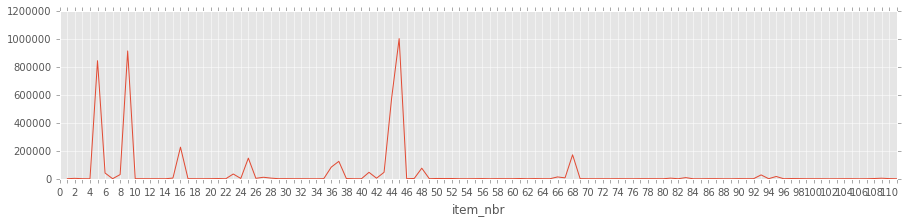

In [65]:
train_group_dates_df.groupby(by='item_nbr')['units'].sum().plot(figsize=(15,3));
plt.xticks(np.r_[0:112:1], [i if i%2==0 else '' for i in np.r_[0:112:1] ]);

Суммарные продажи для каждого из магазинов

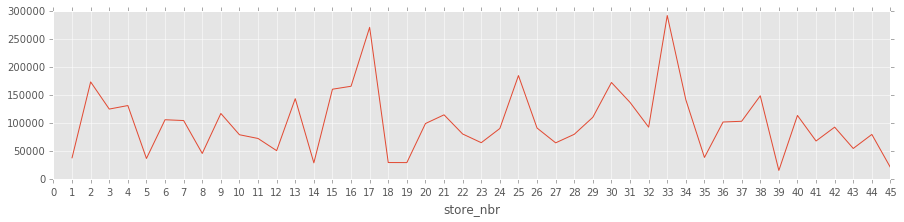

In [57]:
train_group_dates_df.groupby(by='store_nbr')['units'].sum().plot(figsize=(15,3));
plt.xticks(np.r_[0:46:1]);

Объединяем данные о продажах в более экономный по памяти "heatmap" дэйтафрейм. В столбцах должны быть представлены дата продаж, индекс магазина, а также 111 столбцов соответствующих объёмам продаж каждого из товаров для даннго магазина и данной даты.

In [18]:
train_df.store_nbr=train_df.store_nbr.astype('int16')
train_df.item_nbr=train_df.item_nbr.astype('int16')
train_df.units=train_df.units.astype('int16')

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617600 entries, 0 to 4617599
Data columns (total 5 columns):
date          object
store_nbr     int16
item_nbr      int16
units         int16
units_item    object
dtypes: int16(3), object(2)
memory usage: 96.9+ MB


In [20]:
train_df.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [21]:
train_df['units_item'] = pd.Series( ['units_']*len(train_df.index) ) + train_df.item_nbr.apply(str)

In [22]:
train_df.head()

,date,store_nbr,item_nbr,units,units_item
0,2012-01-01,1,1,0,units_1
1,2012-01-01,1,2,0,units_2
2,2012-01-01,1,3,0,units_3
3,2012-01-01,1,4,0,units_4
4,2012-01-01,1,5,0,units_5


In [24]:
train_group_units_df = train_df.pivot_table(values='units',index=['date','store_nbr'],columns='units_item')

In [25]:
train_group_units_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41600 entries, (2012-01-01, 1) to (2014-10-31, 45)
Columns: 111 entries, units_1 to units_99
dtypes: int16(111)
memory usage: 9.0+ MB


Размер первоначального дэйтафрейма удалось сократить со 158 до 9 Мб.

In [26]:
%whos

Variable               Type         Data/Info
---------------------------------------------
convert_date           function     <function convert_date at 0x077CA6A8>
datetime               module       <module 'datetime' from '<...>onda3\\lib\\datetime.py'>
matplotlib             module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np                     module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                     module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                    module       <module 'matplotlib.pylab<...>s\\matplotlib\\pylab.py'>
train_df               DataFrame                   date  stor<...>4617600 rows x 5 columns]
train_group_units_df   DataFrame    units_item            uni<...>41600 rows x 111 columns]


In [34]:
train_group_units_df.reset_index(inplace=True)

train_group_units_df.columns.name=''

In [63]:
sorted_columns = sorted(train_group_units_df.columns.drop(['date','store_nbr']), 
       key=lambda x: float(x[6:]))

train_group_units_df = train_group_units_df.reindex_axis(['date','store_nbr']+sorted_columns, axis=1)

In [64]:
train_group_units_df.head()

,date,store_nbr,units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,...,units_102,units_103,units_104,units_105,units_106,units_107,units_108,units_109,units_110,units_111
0,2012-01-01,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01,2,0,0,0,0,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01,3,0,0,0,0,214,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Сохраняем полученный дэйтафрейм в виде сжатого csv файла

In [65]:
# train_group_units_df.to_csv('data\\ng_train_group_units_df.csv.gz', compression='gzip')